<a href="https://colab.research.google.com/github/rekuantsun/PTDL-Python/blob/main/Pandas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Câu 1:** Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh (sử dụng Google Colab)

In [1]:
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sta
import seaborn as sns

**Câu 2:** Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Học Lập Trình/Học kỳ 2/PTDL - Python /database.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

**Câu 3:** Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương sai - độ lệch chuẩn, các phép tính phân vị, cực đại - cực tiểu để tính các thông sô cơ bản của các cột dữ liệu định lượng này.

**Bài làm:**

In [6]:
# Lựa chọn các cột dữ liệu có kiểu dữ liệu định lượng
df1 = pd.DataFrame(df, columns = ['Aircraft Mass','Engines','Engine2 Position','Engine4 Position','Engine Make','Height','Speed','Distance','Fatalities','Injuries'])
df1.head(10)

,Aircraft Mass,Engines,Engine2 Position,Engine4 Position,Engine Make,Height,Speed,Distance,Fatalities,Injuries
0,4.0,2.0,1.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN
1,4.0,2.0,5.0,NaN,34.0,0.0,NaN,0.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,3.0,2.0,NaN,NaN,22.0,200.0,138.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,100.0,200.0,NaN,NaN,NaN
5,4.0,2.0,5.0,NaN,34.0,0.0,NaN,0.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
9,3.0,2.0,4.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN


In [14]:
df1.describe()

,Aircraft Mass,Engines,Engine2 Position,Engine4 Position,Engine Make,Height,Speed,Distance,Fatalities,Injuries
count,127320.000000,127342.000000,118715.000000,3092.000000,123434.000000,103677.000000,71258.000000,99713.000000,565.000000,229.000000
mean,3.510611,2.057656,2.918570,2.058538,21.306958,831.032283,141.925622,0.703738,0.046018,1.746725
std,0.873783,0.469374,2.008204,1.441000,11.023161,1803.650833,46.905651,3.464467,0.435164,6.571239
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,2.000000,1.000000,1.000000,10.000000,0.000000,120.000000,0.000000,0.000000,1.000000
50%,4.000000,2.000000,1.000000,1.000000,22.000000,50.000000,138.000000,0.000000,0.000000,1.000000
75%,4.000000,2.000000,5.000000,4.000000,34.000000,800.000000,160.000000,0.000000,0.000000,1.000000
max,5.000000,4.000000,7.000000,5.000000,92.000000,31300.000000,2500.000000,150.000000,8.000000,100.000000


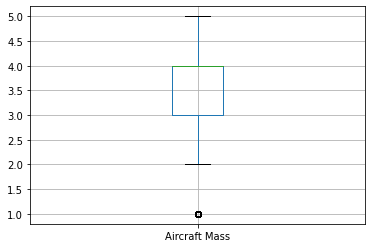

In [7]:
df1.boxplot('Aircraft Mass')

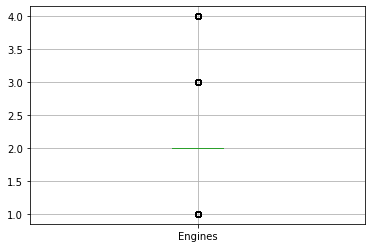

In [8]:
df1.boxplot('Engines')

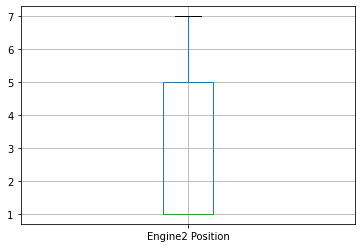

In [9]:
df1.boxplot('Engine2 Position')

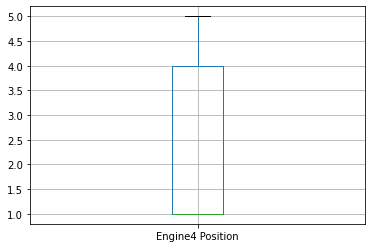

In [10]:
df1.boxplot('Engine4 Position')

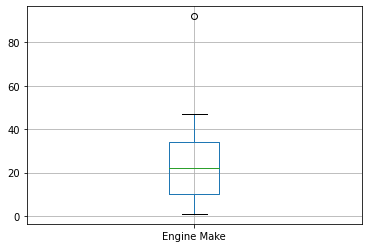

In [11]:
df1.boxplot('Engine Make')

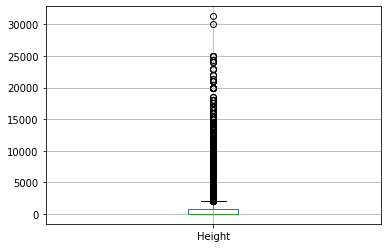

In [12]:
df1.boxplot('Height')

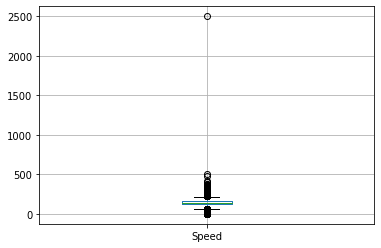

In [13]:
df1.boxplot('Speed')

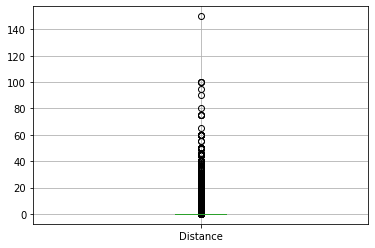

In [ ]:
df1.boxplot('Distance')

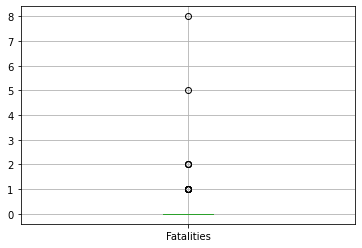

In [ ]:
df1.boxplot('Fatalities')

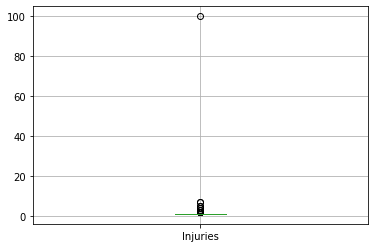

In [ ]:
df1.boxplot('Injuries')

**Nhận xét:**

Các cột định lượng chứa giá trị ngoại lệ, bao gồm:

- Aircraft Mass

- Engines

- Engine Make

- Height

- Speed

- Distance

- Fatalities

- Injuries

**Câu 5:** Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn
hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

Gợi ý: sử dụng chỉ số z hoặc hàm tính phân vị (quantile)

**Bài làm:**

In [ ]:
# Gộp các cột chứa giá trị ngoại lệ vào biến df2
df2 = pd.DataFrame(df, columns = ["Aircraft Mass","Engines","Engine Make","Height","Speed","Distance","Fatalities","Injuries"])

In [ ]:
# Thay thế các giá trị nan bằng giá trị trung bình của các cột "Engine Make","Height","Speed"
colname_df2= df2.columns 
for i in colname_df2:
  df2[i] = df2[i].fillna(df2[i].mean())

In [ ]:
# Sử dụng thư viện scipy để thực hiện tính toán giá trị zscore.
df2_zscore = np.abs(stats.zscore(df2))
# Loại bỏ giá trị ngoại biên
df2_zscore = df2[(df2_zscore < 3).all(axis=1)]

**Câu 6:** Thực hiện lại câu 3 – 4 với tập dữ liệu sau khi đã loại bỏ ngoại lệ.

**Bài làm:**

Mô tả các thông số cơ bản của tập dữ liệu định lượng sau khi đã loại bỏ giá trị ngoại lệ.


In [ ]:
df2_zscore.describe() 

,Aircraft Mass,Engines,Engine Make,Height,Speed,Distance,Fatalities,Injuries
count,155406.000000,155406.000000,155406.000000,155406.000000,155406.000000,155406.000000,155406.000000,155406.000000
mean,3.606688,2.058889,21.696650,625.908708,140.531162,0.400351,0.045854,1.746746
std,0.513715,0.235242,8.959359,702.843576,19.352776,0.748829,0.002740,0.002316
min,2.000000,1.000000,1.000000,0.000000,55.000000,0.000000,0.000000,1.746725
25%,3.510611,2.000000,19.000000,2.000000,141.925622,0.000000,0.046018,1.746725
50%,4.000000,2.000000,21.306958,831.032283,141.925622,0.000000,0.046018,1.746725
75%,4.000000,2.057656,31.000000,831.032283,141.925622,0.703738,0.046018,1.746725
max,5.000000,3.000000,47.000000,5000.000000,230.000000,8.500000,0.046018,2.000000


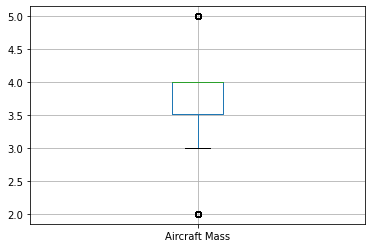

In [ ]:
#Biểu đổ boxplot của cột Aircraft Mass sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Aircraft Mass')

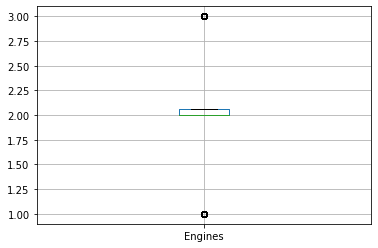

In [ ]:
#Biểu đồ boxplot của cột Engines sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Engines')

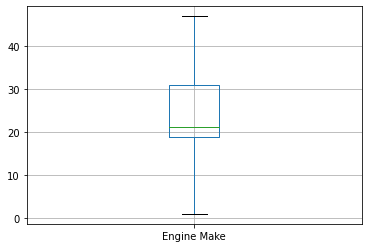

In [ ]:
#Biểu đồ boxplot của cột Engine Make sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Engine Make')

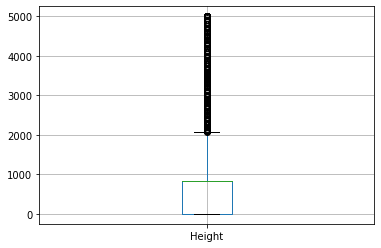

In [ ]:
#Biểu đồ boxplot của cột Height sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Height')

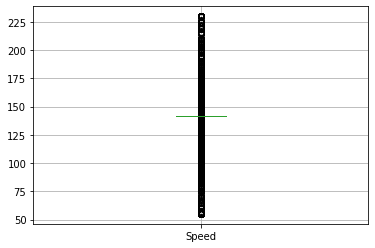

In [ ]:
#Biểu đồ boxplot của cột Speed sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Speed')

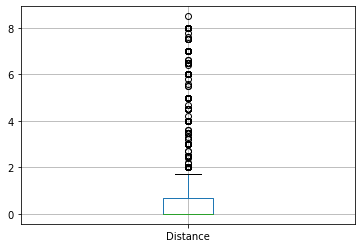

In [ ]:
# Biểu đồ boxplot của cột dữ liệu Distance sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Distance')

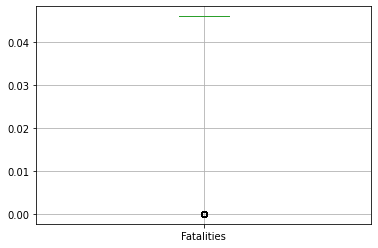

In [ ]:
# Biểu đồ boxplot của cột dữ liệu Fatalities sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Fatalities')

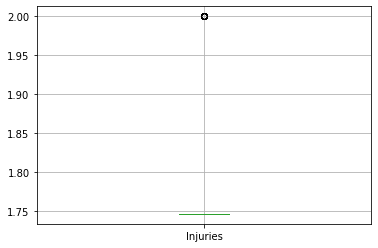

In [ ]:
# Biểu đồ boxplot của cột dữ liệu Injuries sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Injuries')

**Câu 7:** Hãy tính độ tương quan (correlation) giữa các cột định lượng. (Hay xây dựng correlation matrix)

**Bài làm:**

In [ ]:
corr_matrix = df1.corr()
print(corr_matrix)

                  Aircraft Mass   Engines  Engine2 Position  Engine4 Position  \
Aircraft Mass          1.000000  0.515278         -0.450428         -0.576765   
Engines                0.515278  1.000000          0.204964               NaN   
Engine2 Position      -0.450428  0.204964          1.000000          0.851701   
Engine4 Position      -0.576765       NaN          0.851701          1.000000   
Engine Make            0.184513  0.229766          0.271807         -0.565089   
Height                 0.086614  0.048184         -0.073610         -0.074727   
Speed                  0.431402  0.274281         -0.137423         -0.220360   
Distance               0.078564  0.038374         -0.082867          0.023917   
Fatalities            -0.444041 -0.168305         -0.572131               NaN   
Injuries               0.227976  0.105028         -0.296665               NaN   

                  Engine Make    Height     Speed  Distance  Fatalities  \
Aircraft Mass        0.184513  0.

**Câu 8:** Từ correlation matrix, Hãy vẽ:
- Heat map (biểu đồ nhiệt)
- Pair plot (biểu đồ cặp)

**Bài làm:**

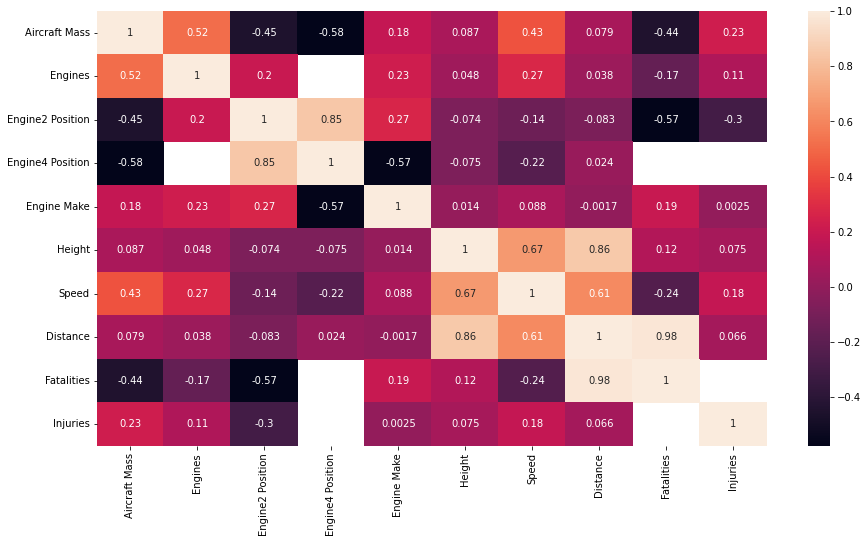

In [ ]:
# Biểu đồ nhiệt từ bảng correlation (Heat map)
sns.heatmap(corr_matrix, annot=True)
plt.gcf().set_size_inches(15,8)

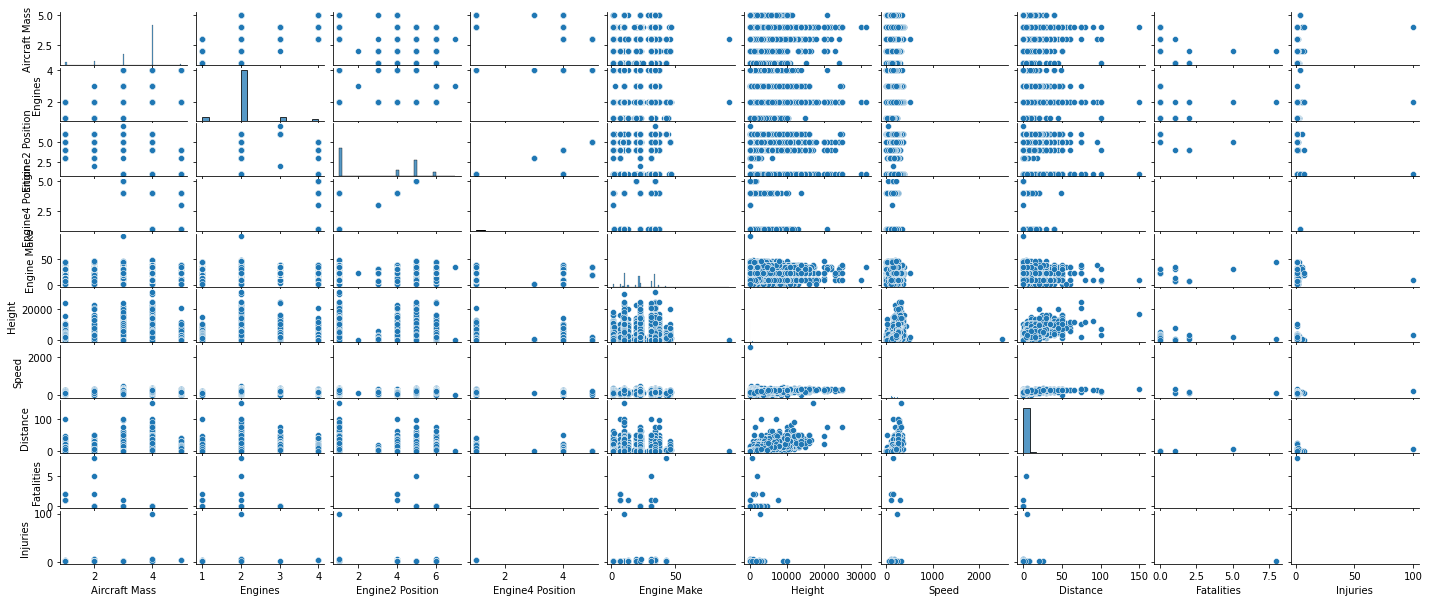

In [ ]:
# Biểu đồ cặp từ bảng correlation (Pair plot)
sns.pairplot(df1)
plt.gcf().set_size_inches(20,8)

**Câu 9:** Đối với các cột dữ liệu định tính, hãy:
- Vẽ biểu đồ cột dạng đứng
- Vẽ biểu đồ cột dạng ngang
- Vẽ biểu đồ đường tròn
- Vẽ biểu đồ Pareto

**Bài làm:**

**Biểu đồ cột dạng đứng**

Đại diện: Cột Incident Month

<BarContainer object of 12 artists>

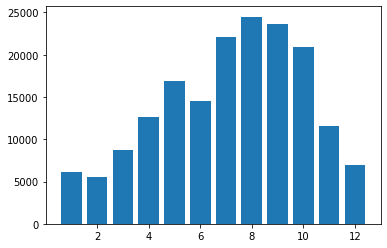

In [ ]:
x = dict(df["Incident Month"].value_counts()).keys()
y = dict(df["Incident Month"].value_counts()).values()
plt.bar(x,y)

**Biểu đồ cột dạng ngang**

Đại diện: Cột Incident Day

<BarContainer object of 31 artists>

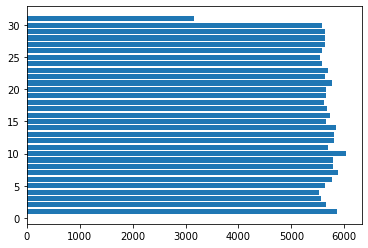

In [ ]:
x = dict(df["Incident Day"].value_counts()).keys()
y = dict(df["Incident Day"].value_counts()).values()
plt.barh(list(x),list(y))

**Biểu đồ tròn**

Đại diện: Cột Engine2 Position

In [ ]:
bdtron = df['Engine2 Position'].value_counts()
bdtron 

1.0    60614
5.0    35365
4.0    13435
6.0     9131
3.0      168
2.0        1
7.0        1
Name: Engine2 Position, dtype: int64

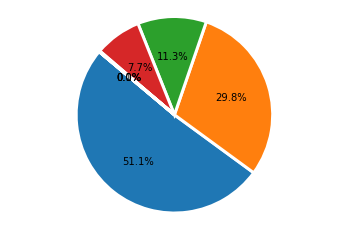

In [ ]:
plt.pie(bdtron,
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        startangle=140)
plt.axis('equal')
plt.show()

**Biểu đồ đường Pareto**

Đại diện: Cột Engine Type

In [ ]:
from matplotlib.ticker import PercentFormatter

In [ ]:
count_enginetype = dict(df['Engine Type'].value_counts()).values()

pareto_df = pd.DataFrame({'count':count_enginetype})
pareto_df.index = list(dict(df['Engine Type'].value_counts()).keys())

pareto_df['cumperc'] = pareto_df['count'].cumsum()/pareto_df['count'].sum()*100
print(pareto_df)

      count     cumperc
D    104501   82.101947
C     12065   91.580899
A      8247   98.060213
F      1940   99.584387
B       386   99.887651
A/C      71   99.943433
B/D      61   99.991358
c        10   99.999214
X         1  100.000000


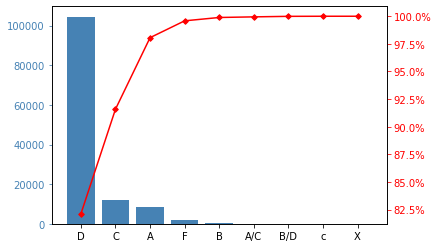

In [ ]:
color1 = 'steelblue'
color2 = 'red'
line_size = 4

fig, ax = plt.subplots()
ax.bar(pareto_df.index, pareto_df['count'], color=color1)

ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
plt.show()